## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [24]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [25]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

#### Shape of the dataset


In [26]:
df.shape

(1000, 8)

### 2.2 Dataset information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [31]:
##Check Missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [33]:
##Check Duplicates
df.duplicated().sum()

np.int64(0)

In [35]:
##Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
##Check the number of unique values of each column
for feature in df.columns:
    print(f"{feature}:{df[feature].nunique()}")

gender:2
race_ethnicity:5
parental_level_of_education:6
lunch:2
test_preparation_course:2
math_score:81
reading_score:72
writing_score:77


In [43]:
##Check statistics of data set
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [54]:
##Check various categories present in the different categorical column
cat_col=[]
num_col=[]
cat_col_categories={}
for feature in df.columns:
    if df[feature].dtype=="O":
        cat_col.append(feature)
        cat_col_categories[feature]=df[feature].unique()
    else:
        num_col.append(feature)




#### Categorical features with categories

In [55]:
##categorical features
for feature,categories in cat_col_categories.items():
    print(f"{feature}:{categories}")


gender:['female' 'male']
race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:['standard' 'free/reduced']
test_preparation_course:['none' 'completed']


#### Numerical features


In [52]:
##numerical features
for feature in num_col:
    print(feature)

math_score
reading_score
writing_score


### Adding columns for "Total Score" and "Average"


In [57]:
df["Total_Score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average"]=df["Total_Score"]/3
df.head()


gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Total_Score    Average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

### Performance comparison


In [61]:
## Student scoring 100 marks
for feature in num_col:
    print(f"{feature}:{(df[feature]==100).sum()}")

math_score:7
reading_score:17
writing_score:14


In [63]:
## Student scoring less than 20 marks
for feature in num_col:
    print(f"{feature}:{(df[feature]<=20).sum()}")

math_score:4
reading_score:1
writing_score:3


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

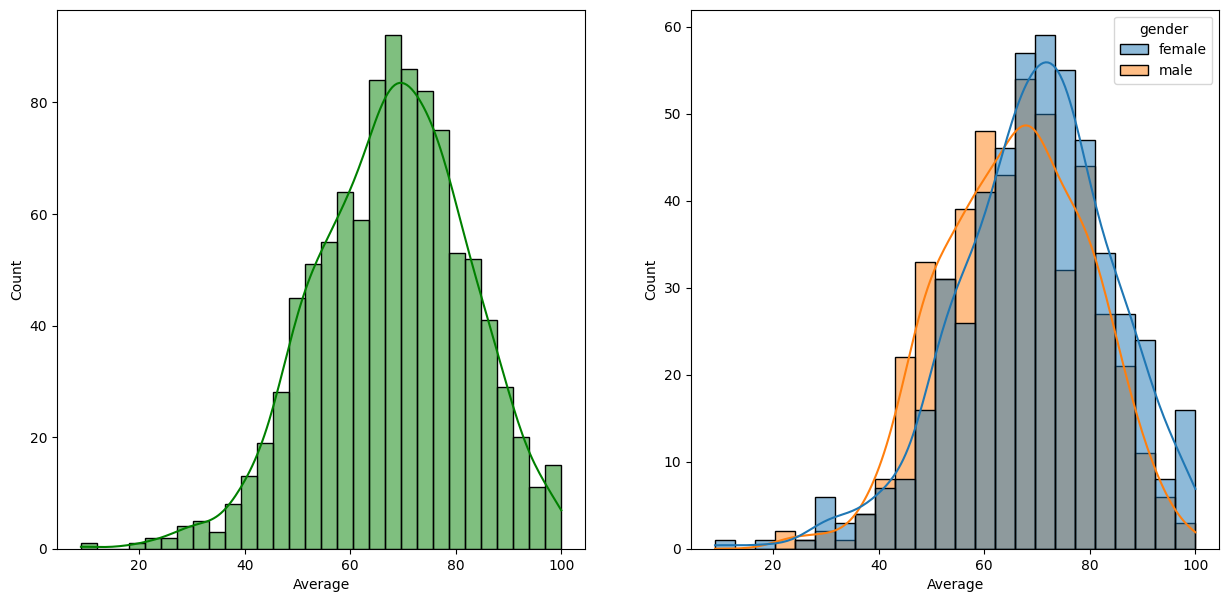

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

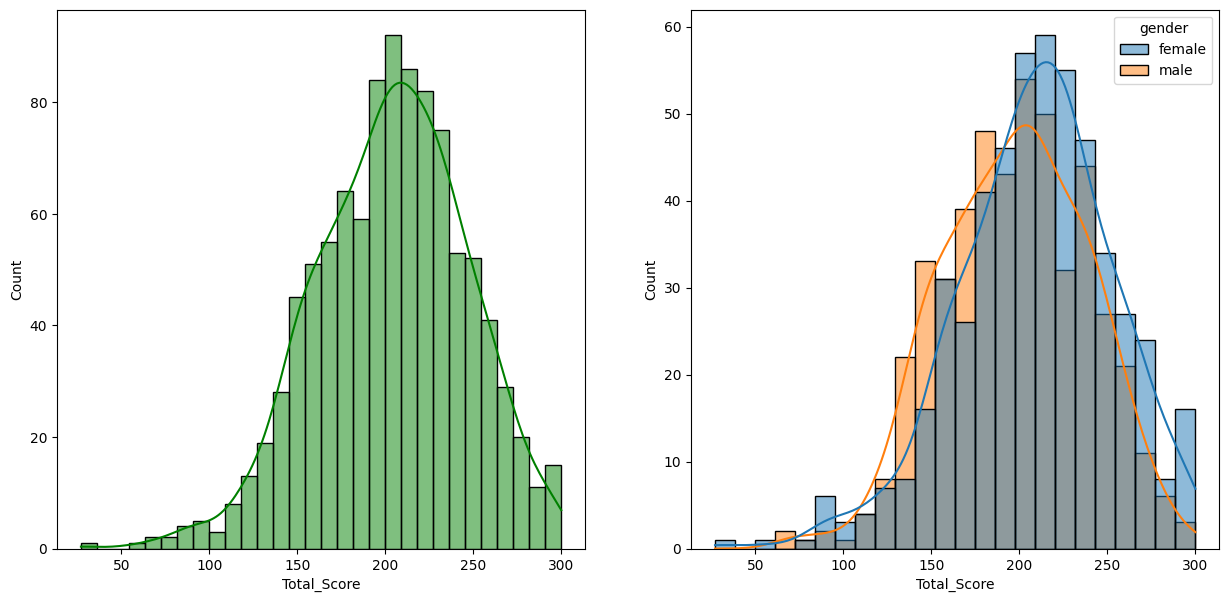

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()